In [1]:
import numpy as np
import pandas as pd
# from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
# import sklearn

In [2]:
import os

---

In [3]:
train  = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')

train = train.drop(['index'],axis = 1)
test =test.drop(['index'],axis = 1)

In [4]:
concat_features = train

mask = concat_features.introelapse > (concat_features.introelapse.quantile(0.75) + 1.5 * (concat_features.introelapse.quantile(0.75) - concat_features.introelapse.quantile(0.25)))
concat_features.introelapse[mask] = concat_features.introelapse.quantile(0.75)

mask = concat_features.testelapse > (concat_features.testelapse.quantile(0.75) + 1.5 * (concat_features.testelapse.quantile(0.75) - concat_features.testelapse.quantile(0.25)))
concat_features.testelapse[mask] = concat_features.testelapse.quantile(0.75)

mask = concat_features.surveyelapse > (concat_features.surveyelapse.quantile(0.75) + 1.5 * (concat_features.surveyelapse.quantile(0.75) - concat_features.surveyelapse.quantile(0.25)))
concat_features.surveyelapse[mask] = concat_features.surveyelapse.quantile(0.75)

train = concat_features



concat_features = test

mask = concat_features.introelapse > (concat_features.introelapse.quantile(0.75) + 1.5 * (concat_features.introelapse.quantile(0.75) - concat_features.introelapse.quantile(0.25)))
concat_features.introelapse[mask] = concat_features.introelapse.quantile(0.75)

mask = concat_features.testelapse > (concat_features.testelapse.quantile(0.75) + 1.5 * (concat_features.testelapse.quantile(0.75) - concat_features.testelapse.quantile(0.25)))
concat_features.testelapse[mask] = concat_features.testelapse.quantile(0.75)

mask = concat_features.surveyelapse > (concat_features.surveyelapse.quantile(0.75) + 1.5 * (concat_features.surveyelapse.quantile(0.75) - concat_features.surveyelapse.quantile(0.25)))
concat_features.surveyelapse[mask] = concat_features.surveyelapse.quantile(0.75)

test = concat_features


In [5]:
train.loc[train['age'] == 0, 'age'] = train['age'].mean()
test.loc[test['age'] == 0, 'age'] = train['age'].mean()

In [6]:

train.loc[train['age'] > 65, 'age'] = 0
test.loc[test['age'] > 65, 'age'] = 0

In [7]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(train[name], prefix = name)
    train = pd.concat([train, mergedata], axis=1)
    train = train.drop([name], axis = 1)

In [8]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(test[name], prefix = name)
    test = pd.concat([test, mergedata], axis=1)
    test = test.drop([name], axis = 1)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 94 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Q1             14959 non-null  float64
 1   Q2             14931 non-null  float64
 2   Q3             14950 non-null  float64
 3   Q4             14929 non-null  float64
 4   Q5             14962 non-null  float64
 5   Q6             14952 non-null  float64
 6   Q7             14924 non-null  float64
 7   Q8             14952 non-null  float64
 8   Q9             14944 non-null  float64
 9   Q10            14928 non-null  float64
 10  Q11            14941 non-null  float64
 11  Q12            14933 non-null  float64
 12  Q13            14960 non-null  float64
 13  Q14            14964 non-null  float64
 14  Q15            14955 non-null  float64
 15  Q16            14967 non-null  float64
 16  Q17            14963 non-null  float64
 17  Q18            14937 non-null  float64
 18  Q19   

<AxesSubplot: >

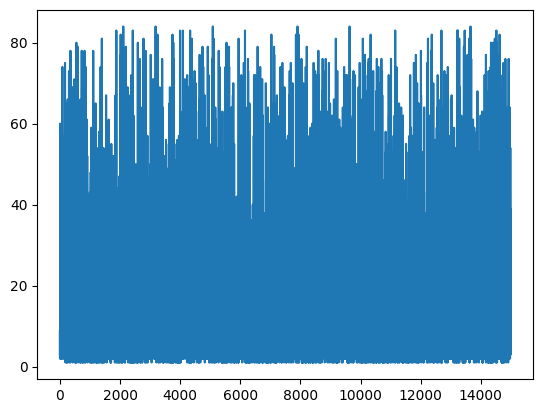

In [10]:
train.introelapse.plot()

In [11]:
train['Ex'] = train['TIPI1']-train['TIPI6']
train['Ag'] = train['TIPI7']-train['TIPI2']
train['Con'] = train['TIPI3']-train['TIPI8']
train['Es'] =train['TIPI9']-train['TIPI4']
train['Op'] =train['TIPI5']-train['TIPI10']

In [12]:
test['Ex'] = test['TIPI1']-test['TIPI6']
test['Ag'] = test['TIPI7']-test['TIPI2']
test['Con'] = test['TIPI3']-test['TIPI8']
test['Es'] =test['TIPI9']-test['TIPI4']
test['Op'] =test['TIPI5']-test['TIPI10']

In [13]:
train = train.drop(['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5',
                   'TIPI6','TIPI7','TIPI8','TIPI9','TIPI10'],axis = 1)

test = test.drop(['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5',
                   'TIPI6','TIPI7','TIPI8','TIPI9','TIPI10'],axis = 1)

In [14]:
from sklearn.preprocessing import LabelEncoder
ex = LabelEncoder()

con8 = train.country.value_counts().keys()[:8]

for i in range(train.count().max()):
    if(train.country.values[i] not in con8):
        train.country.values[i] = "X"

for i in range(test.count().max()):
    if(test.country.values[i] not in con8):
        test.country.values[i] = "X"

train.country = ex.fit_transform(train.country)

test.country = ex.fit_transform(test.country)

---

In [15]:
# pip install pycaret

In [27]:
from pycaret.classification import *

model = setup(data = train, target = 'nerdiness',use_gpu=True,session_id=2023, normalize = True, normalize_method = 'zscore',transformation=True,train_size=0.75)

,Description,Value
0,session_id,2023
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 89)"
5,Missing Values,True
6,Numeric Features,38
7,Categorical Features,50
8,Ordinal Features,False
9,High Cardinality Features,False


In [30]:
best_2 = compare_models(sort = 'Accuracy', n_select = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7762,0.8661,0.8390,0.7778,0.8072,0.5414,0.5438,0.8090
rf,Random Forest Classifier,0.7756,0.8631,0.8436,0.7748,0.8076,0.5397,0.5427,0.7370
xgboost,Extreme Gradient Boosting,0.7586,0.8264,0.8145,0.7676,0.7902,0.5065,0.5079,0.6550
catboost,CatBoost Classifier,0.7583,0.8285,0.8229,0.7631,0.7918,0.5048,0.5070,7.6450
lightgbm,Light Gradient Boosting Machine,0.7492,0.8214,0.8162,0.7550,0.7842,0.4860,0.4886,1.0180
gbc,Gradient Boosting Classifier,0.7356,0.8026,0.8028,0.7440,0.7722,0.4581,0.4602,5.0180
lr,Logistic Regression,0.7292,0.7967,0.7895,0.7421,0.7649,0.4462,0.4476,1.3210
ridge,Ridge Classifier,0.7278,0.0000,0.7942,0.7382,0.7651,0.4426,0.4444,0.0760
lda,Linear Discriminant Analysis,0.7275,0.7956,0.7939,0.7379,0.7648,0.4418,0.4437,0.4020
ada,Ada Boost Classifier,0.7227,0.7919,0.7839,0.7367,0.7594,0.4328,0.4342,1.6000


In [35]:
tuned_top2 = [tune_model(i,n_iter=100) for i in best_2]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7609,0.8222,0.8325,0.7609,0.7951,0.5094,0.5124
1,0.7538,0.8329,0.8264,0.7555,0.7894,0.4945,0.4974
2,0.7538,0.8231,0.8376,0.7504,0.7916,0.4930,0.4975
3,0.7058,0.7858,0.8153,0.7043,0.7557,0.3908,0.3975
4,0.7298,0.7898,0.8010,0.7375,0.7679,0.4458,0.4480
5,0.7333,0.8061,0.8232,0.7323,0.7751,0.4503,0.4550
6,0.7467,0.8127,0.8121,0.7533,0.7816,0.4810,0.4830
7,0.7129,0.7762,0.7978,0.7188,0.7562,0.4093,0.4126
8,0.7333,0.7894,0.8073,0.7391,0.7717,0.4527,0.4552


In [36]:
blended = blend_models(estimator_list = tuned_top2, fold = 3, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7435,0.8162,0.8227,0.7445,0.7817,0.4726,0.4761
1,0.7264,0.7955,0.8108,0.7293,0.7679,0.4370,0.4407
2,0.7203,0.7950,0.8041,0.7248,0.7624,0.4246,0.4280
Mean,0.7300,0.8022,0.8125,0.7329,0.7706,0.4447,0.4482
Std,0.0098,0.0099,0.0077,0.0084,0.0081,0.0204,0.0204


In [37]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7392,0.8077,0.8118,0.7335,0.7706,0.4702,0.4735


In [38]:
final_model = finalize_model(blended)

In [39]:
predictions = predict_model(final_model, data = test)

In [40]:
predictions['Score']

0        0.6645
1        0.7911
2        0.8242
3        0.6013
4        0.7182
          ...  
35447    0.7390
35448    0.7907
35449    0.9170
35450    0.5543
35451    0.7580
Name: Score, Length: 35452, dtype: float64

In [41]:
predictions['Label']

0        1
1        1
2        1
3        1
4        1
        ..
35447    1
35448    1
35449    1
35450    1
35451    1
Name: Label, Length: 35452, dtype: int32

In [42]:
predictions.loc[predictions['Label'] == 0, 'Score'] = 1 - predictions.loc[predictions['Label'] == 0, 'Score']

In [43]:
predictions['Score']

0        0.6645
1        0.7911
2        0.8242
3        0.6013
4        0.7182
          ...  
35447    0.7390
35448    0.7907
35449    0.9170
35450    0.5543
35451    0.7580
Name: Score, Length: 35452, dtype: float64

In [44]:
sub = predictions['Score']

In [45]:
sub

0        0.6645
1        0.7911
2        0.8242
3        0.6013
4        0.7182
          ...  
35447    0.7390
35448    0.7907
35449    0.9170
35450    0.5543
35451    0.7580
Name: Score, Length: 35452, dtype: float64

In [46]:
submission = pd.read_csv('./data/sample_submission.csv')

submission['nerdiness'] = sub

In [47]:
submission

,index,nerdiness
0,0,0.6645
1,1,0.7911
2,2,0.8242
3,3,0.6013
4,4,0.7182
...,...,...
35447,35447,0.7390
35448,35448,0.7907
35449,35449,0.9170
35450,35450,0.5543


In [48]:
submission.to_csv("./submit/submit9.csv", index = False)